In [103]:
import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Convolution2D, MaxPooling2D, Flatten , Activation, Lambda, Convolution1D
from tensorflow.keras.optimizers import RMSprop,Adam


In [5]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))


['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [118]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]


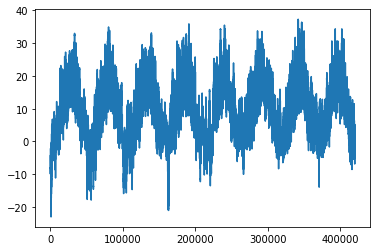

In [7]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

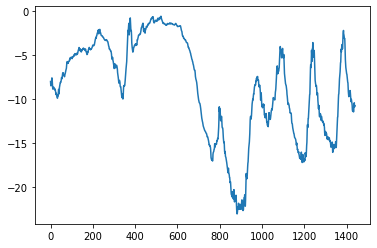

In [8]:
plt.plot(range(1440), temperature[:1440])

In [112]:
train_dataset1 = keras.utils.timeseries_dataset_from_array(
    data=temperature[:-60],
    targets=temperature[60:],
    sampling_rate=0.001,
    sequence_length=60,
    shuffle=True,
    batch_size=60,
    start_index=0,
    end_index=0+60)
#for temperature ,targets in train_dataset1:#aquí no se porque no me permitió visualizar, si mis inputs son la
    #temperatura en train_dataset1
    #print("series x")
    #print(temperature)
    #print("y")
    #print(targets)


In [ ]:
#error{{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Requires delta != 0: 0
	 #[[{{node range}}]] [Op:IteratorGetNext]#

In [113]:
val_dataset2 = keras.utils.timeseries_dataset_from_array(
    data=temperature[:-30],
    targets=temperature[30:],
    sampling_rate=0.0001,
    sequence_length=30,
    shuffle=True,
    batch_size=30,
    start_index=60,
    end_index=60+30)


In [64]:
test_dataset3 = keras.utils.timeseries_dataset_from_array(
    data=temperature[:-30],
    targets=temperature[30:],
    sampling_rate=0.001,
    sequence_length=30,
    shuffle=True,
    batch_size=30,
    start_index=90,
    end_index=90+30)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, None, 32)          192       
                                                                 
 conv1d_13 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_14 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_15 (Conv1D)          (None, None, 32)          5152      
                                                                 
 dense_8 (Dense)             (None, None, 1)           33        
                                                                 
 lambda_2 (Lambda)           (None, None, 1)           0         
                                                                 
Total params: 15,681
Trainable params: 15,681
Non-trai

/var/folders/bl/kdbtswx10j73zpfw043m561r0000gn/T/ipykernel_18134/1448295019.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(seq_length, seq_length + look_ahead),Y[i,:,0],'bo',color='orange')


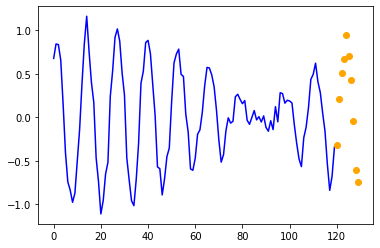

In [109]:
seq_length = 120  # Sequence length used for training
look_ahead =  10 

def gen_data(size=1000, noise=0.1): # We create 1000 data-points
    s = seq_length + look_ahead
    d = np.zeros((size, s,1))
    for i in range(size):
        start = np.random.uniform(0, 2*np.pi) # Random start point
        d[i,:,0] = np.sin(start + np.linspace(0, 20*np.pi, s)) * np.sin(start + np.linspace(0, np.pi, s)) + np.random.normal(0,noise,s)
        return d[:,0:seq_length], d[:,seq_length:s]
X,Y = gen_data()
for i in range(1):
    plt.plot(range(0, seq_length),X[i,:,0],'b-')
    plt.plot(range(seq_length, seq_length + look_ahead),Y[i,:,0],'bo',color='orange')

def slice(x, slice_length):
    return x[:,-slice_length:,:]

model1 = Sequential()
ks = 5
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', batch_input_shape=(None, None, 1)))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Dense(1))
model1.add(Lambda(slice, arguments={'slice_length':look_ahead}))

model1.summary()
model1.compile(optimizer='adam', loss='mean_squared_error')


history1 = model1.fit(X[60:90], Y[60:90],
                    epochs=150,
                    batch_size=120,
                    validation_data=(X[60:90],Y[60:90]),
                    verbose=0)

In [ ]:
#como son 10 pasos, entradas  9 temps anteriores y la del mero dia es la salida

In [ ]:
pronost=df[]#pense que podría pronosticar con este comando, pero no se de que fecha a que fecha va

In [111]:
#opción qu siento más natural pero que no funcionó porque no se bien como obtener la xy en valores
PASOS=10
model = Sequential() 
model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
model.add(Flatten())
model.add(Dense(1, activation='tanh'))
model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
model.summary()
  

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1, 10)             110       
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [115]:
model.fit(train_dataset,epochs=230,batch_size=PASOS)

Epoch 1/230


2023-11-02 02:40:39.217183: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Requires delta != 0: 0
	 [[{{node range}}]]
2023-11-02 02:40:39.217211: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Requires delta != 0: 0
	 [[{{node range}}]]
2023-11-02 02:40:39.217228: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Requires delta != 0: 0
	 [[{{node range}}]]
2023-11-02 02:40:39.217245: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0

InvalidArgumentError: Graph execution error:

Detected at node 'range' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
      self.io_loop.start()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once
      handle._run()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell
      await result
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/bl/kdbtswx10j73zpfw043m561r0000gn/T/ipykernel_18134/983895863.py", line 1, in <module>
      model.fit(train_dataset,epochs=230,batch_size=PASOS)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/engine/compile_utils.py", line 317, in __call__
      self._total_loss_mean.update_state(
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/utils/metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/keras/metrics/base_metric.py", line 494, in update_state
      value_sum = tf.reduce_sum(values)
Node: 'range'
Requires delta != 0: 0
	 [[{{node range}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_20077]

In [125]:
preassure = np.zeros((len(lines),))
raw_datax = np.zeros((len(lines), len(header) - 2))##excepto los ultimos dos elementos del header
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[2:]]
    preassure[i] = values[2]
    raw_datax[i, :] = values[:]

In [126]:
volumen = np.zeros((len(lines),))
raw_datax = np.zeros((len(lines), len(header) - 3))##excepto los ultimos dos elementos del header
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[3:]]
    preassure[i] = values[3]
    raw_datax[i, :] = values[:]

In [128]:
train_datasetcomplet = keras.utils.timeseries_dataset_from_array(
    data=preassure[:-20],
    #data1=volumen [20:],#aquí pense que podía meter más tipos de datos subdiviendo entre n el total
    targets=temperature[20:],
    sampling_rate=0.001,
    sequence_length=60,
    shuffle=True,
    batch_size=60,
    start_index=0,
    end_index=0+60)

In [ ]:
#... Suspenso en lo que se me ocurre algo